# Linear Regression in TensorFlow

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

### Create model

In [5]:
# set model weights
W = tf.Variable(rng.randn() , name="weight")
b = tf.Variable(rng.randn() , name="bias")

In [6]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [7]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [8]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 8.193725586 W= 0.045433223 b= -1.9168326
Epoch: 0051 cost= 0.457572669 W= 0.59434617 b= -1.6786582
Epoch: 0101 cost= 0.413619965 W= 0.57384187 b= -1.5311527
Epoch: 0151 cost= 0.374741524 W= 0.55455714 b= -1.3924199
Epoch: 0201 cost= 0.340352148 W= 0.5364197 b= -1.2619399
Epoch: 0251 cost= 0.309932917 W= 0.51936054 b= -1.1392184
Epoch: 0301 cost= 0.283026367 W= 0.5033165 b= -1.0237982
Epoch: 0351 cost= 0.259225905 W= 0.4882262 b= -0.9152398
Epoch: 0401 cost= 0.238173962 W= 0.47403377 b= -0.81314
Epoch: 0451 cost= 0.219552681 W= 0.46068525 b= -0.7171116
Epoch: 0501 cost= 0.203081757 W= 0.44813067 b= -0.626795
Epoch: 0551 cost= 0.188512698 W= 0.4363227 b= -0.5418492
Epoch: 0601 cost= 0.175626174 W= 0.42521703 b= -0.46195626
Epoch: 0651 cost= 0.164227843 W= 0.41477197 b= -0.38681492
Epoch: 0701 cost= 0.154145792 W= 0.404948 b= -0.31614193
Epoch: 0751 cost= 0.145228162 W= 0.3957083 b= -0.24967241
Epoch: 0801 cost= 0.137340531 W= 0.38701814 b= -0.18715604
Epoch: 0851 cost= 

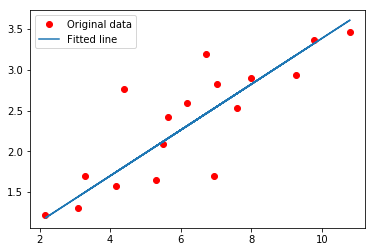

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})),"W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()